In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [42]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('24-iri-final.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('24-iri-final-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('24-iri-final-cleaned.csv')

any nan = False
all finite = True


FileNotFoundError: [Errno 2] No such file or directory: '24-iri-thesis-cleaned.csv'

In [43]:
# Take a quick look at the dataset
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.080,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.130
1,0.000,0.000,0.560,0.000,0.150,0.150,0.420,0.060,0.000,0.000,...,0.000,0.000,0.000,0.000,0.050,0.000,0.000,0.000,0.000,3.750
2,0.000,0.660,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.660,0.000,3.480
3,0.250,0.000,0.000,0.000,0.150,0.000,0.000,1.191,0.662,0.021,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.850
4,0.000,0.000,0.000,0.550,0.000,0.000,0.000,0.000,0.000,0.210,...,0.000,0.000,0.000,0.000,0.150,0.660,0.000,0.660,0.000,3.940


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      468 non-null    float64
 1   A2      468 non-null    float64
 2   A3      468 non-null    float64
 3   B1      468 non-null    float64
 4   B2      468 non-null    float64
 5   B3      468 non-null    float64
 6   C1      468 non-null    float64
 7   C2      468 non-null    float64
 8   C3      468 non-null    float64
 9   D1      468 non-null    float64
 10  D2      468 non-null    float64
 11  D3      468 non-null    float64
 12  E1      468 non-null    float64
 13  E2      468 non-null    float64
 14  E3      468 non-null    float64
 15  F1      468 non-null    float64
 16  F2      468 non-null    float64
 17  F3      468 non-null    float64
 18  G1      468 non-null    float64
 19  G2      468 non-null    float64
 20  G3      468 non-null    float64
 21  H1      468 non-null    float64
 22  H2

In [45]:
df.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
count,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000,...,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000,468.000
mean,0.092,0.230,0.150,0.080,0.218,0.179,0.290,0.413,0.430,0.150,...,0.026,0.020,0.019,0.035,0.061,0.072,0.054,0.132,0.075,4.869
std,0.290,0.561,0.334,0.263,0.480,0.474,0.422,0.584,0.804,0.266,...,0.107,0.069,0.083,0.130,0.175,0.196,0.194,0.425,0.275,2.511
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.560
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.848
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.200,0.150,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.690
75%,0.000,0.234,0.150,0.000,0.150,0.103,0.502,0.600,0.607,0.210,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.380
max,2.500,7.650,2.480,2.100,4.320,4.560,3.010,4.320,12.500,1.833,...,1.200,0.620,1.010,1.200,1.620,2.000,2.220,3.200,3.080,16.250


#### Creation of Linear Regression Objects

In [46]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



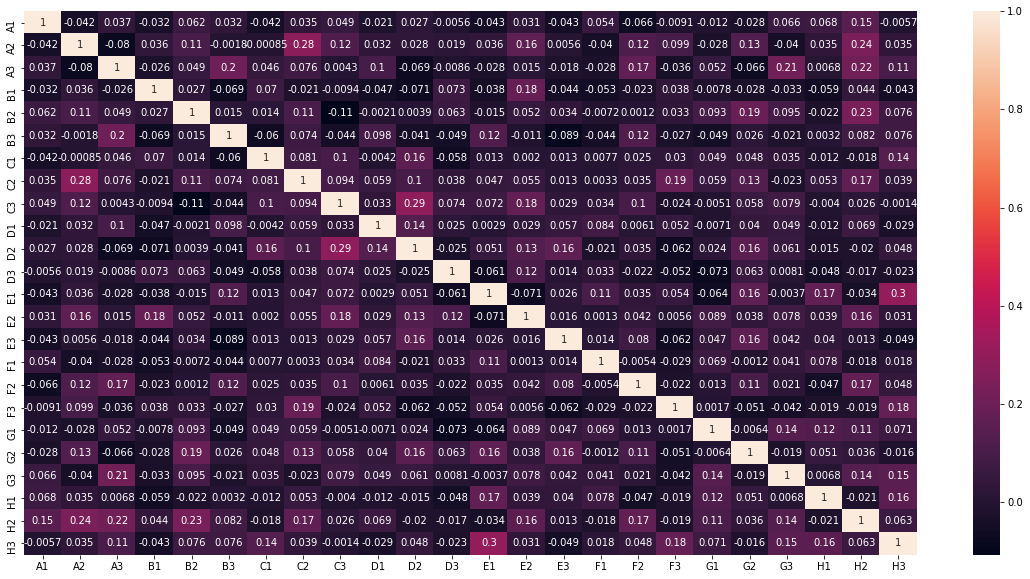

In [47]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [48]:

# sns.pairplot(X)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=25)

In [50]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [51]:
  
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=16)

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)

print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")
# old
# test_r2 = 0.5047813879824847
# train_r2 = 0.5779951106820418

test_r2 = 0.501416730152786
train_r2 = 0.5885495264308254


#### Printing the individual $\beta$ values

In [52]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ 0.59631613  0.34821452  1.81324302 -0.06548339  0.20998511 -0.02746221
  0.49404889  0.03525548  0.40285022  0.38038024  0.52394341  1.65504838
  0.97864569  0.29701711  0.44017884  4.12617571  8.0966199  12.10996424
  0.44325985  0.11472555  1.49961742 -0.13526509  0.22454853  0.57011339]
Intercept: 2.5501290963985888


line: y = 0.41085796652757867 * x + 2.48974784225188


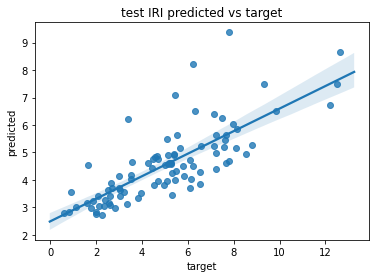

In [53]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.5885495264308258 * x + 1.9817941112092115


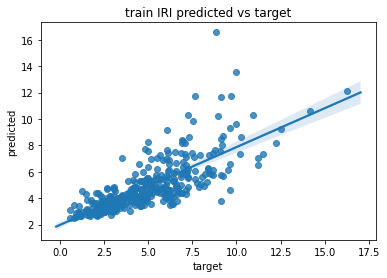

In [54]:
x_train_prediction = multi_linear.predict(X_train)
ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [55]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=16)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()

# filtered = filter(lambda x: x > 0.1 , p_values)
# print((pd.Series(filtered)))
# print(p_values)

results.summary()

const   0.000
A1      0.075
A2      0.041
A3      0.000
B1      0.844
B2      0.260
B3      0.891
C1      0.026
C2      0.829
C3      0.000
D1      0.230
D2      0.044
D3      0.000
E1      0.052
E2      0.178
E3      0.022
F1      0.000
F2      0.000
F3      0.000
G1      0.503
G2      0.831
G3      0.001
H1      0.775
H2      0.315
H3      0.129
dtype: float64


 p_values greater than 0.01
B1   0.844
B2   0.260
B3   0.891
C2   0.829
D1   0.230
E2   0.178
G1   0.503
G2   0.831
H1   0.775
H2   0.315
H3   0.129
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IRI   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     20.80
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           2.54e-53
Time:                        09:34:21   Log-Likelihood:                -707.68
No. Observations:                 374   AIC:                             1465.
Df Residuals:                     349   BIC:                             1563.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5501      0.172     14.836      0.000       2.212       2.888
A1             0.5963      0.334      1.784      0.075      -0.061       1.254
A2             0.3482      0.170      2.054      0.041       0.015       0.682
A3             1.8132      0.273      6.642      0.000       1.276       2.350
B1            -0.0655      0.333     -0.197      0.844      -0.721       0.590
B2             0.2100      0.186      1.128      0.260      -0.156       0.576
B3            -0.0275      0.201     -0.137      0.891      -0.423       0.368
C1             0.4940      0.221      2.231      0.026       0.058       0.930
C2             0.0353      0.163      0.216      0.829      -0.286       0.357
C3             0.4029      0.111      3.620      0.000       0.184       0.622
D1             0.3804      0.316      1.204      0.230      -0.241       1.002
D2             0.5239      0.260      2.018      0.044       0.013       1.035
D3             1.6550      0.244      6.793      0.000       1.176       2.134
E1             0.9786      0.502      1.951      0.052      -0.008       1.965
E2             0.2970      0.220      1.348      0.178      -0.136       0.730
E3             0.4402      0.191      2.306      0.022       0.065       0.816
F1             4.1262      0.752      5.484      0.000       2.646       5.606
F2             8.0966      1.297      6.241      0.000       5.545      10.648
F3            12.1100      1.041     11.635      0.000      10.063      14.157
G1             0.4433      0.662      0.670      0.503      -0.858       1.745
G2             0.1147      0.539      0.213      0.831      -0.945       1.174
G3             1.4996      0.463      3.242      0.001       0.590       2.409
H1            -0.1353      0.472     -0.286      0.775      -1.064       0.794
H2             0.2245      0.223      1.006      0.315      -0.214       0.663
H3             0.5701      0.375      1.521      0.129      -0.167       1.308
==============================================================================
Omnibus:                       18.160   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.995
Skew:                           0.241   Prob(JB):                     9.26e-09
Kurtosis:                       4.463   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
